In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [45]:
flights_info = pd.read_excel(r'C:\Users\popan\Downloads\Data_Train_Airline_Tickets.xlsx')
flights_info

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
flights_info.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
flights_info.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [72]:
flights_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10683 non-null  float64       
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  day              10683 non-null  int64         
 12  month            10683 non-null  int64         
 13  year             10683 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int6

# change column total_stops with int values

In [46]:
flights_info['Total_Stops'] = flights_info['Total_Stops'].replace({'non stops':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [4]:
flights_info

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [47]:
flights_info['Total_Stops'].unique()

array(['non-stop', 2, 1, 3, nan, 4], dtype=object)

In [48]:
### flights_info['Total_Stops'] = flights_info.astype(str).astype({"Total_Stops": float})
flights_info['Total_Stops'] = pd.to_numeric(flights_info.Total_Stops, errors='coerce')

# change null values with mode

In [49]:
flights_info['Total_Stops'].fillna(flights_info['Total_Stops'].mode()[0], inplace=True)

In [50]:
flights_info['Total_Stops'].unique()

array([1., 2., 3., 4.])

In [116]:
flights_info.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [51]:
flights_info.columns= flights_info.columns.str.lower()

# change column date_of_journey to date an split

In [52]:
flights_info.date_of_journey = pd.to_datetime(flights_info.date_of_journey)

In [53]:
flight_reduc = flights_info

In [54]:
flights_info['day'] = flights_info['date_of_journey'].dt.day
flights_info['month'] = flights_info['date_of_journey'].dt.month
flights_info['year'] = flights_info['date_of_journey'].dt.year

In [55]:
flight_reduc['month'] = pd.to_numeric(flight_reduc.month, errors='coerce')

In [56]:
flights_info['year'].unique()

array([2019], dtype=int64)

In [57]:
flights_info['day'].unique()

array([24,  5,  6,  3, 27, 18, 15, 21,  4], dtype=int64)

# year column has one  unique value ,remove year column 

In [58]:
flight_reduc = flight_reduc.drop(columns = ['year','date_of_journey','route'])

In [59]:
flight_reduc['hours'] = flight_reduc.duration.str.split('h', expand = True)[0]

In [60]:
flight_reduc

,airline,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,day,month,hours
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,1.0,No info,3897,24,3,2
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2.0,No info,7662,5,1,7
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2.0,No info,13882,6,9,19
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1.0,No info,6218,5,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1.0,No info,13302,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,1.0,No info,4107,4,9,2
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,1.0,No info,4145,27,4,2
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,1.0,No info,7229,27,4,3
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,1.0,No info,12648,3,1,2


In [61]:
flight_reduc['minutes'] = flight_reduc.duration.str.split(' ', expand = True)[1]

In [62]:
flight_reduc["minutes"] = flight_reduc["minutes"].str.replace("[m]","")

C:\Users\popan\AppData\Local\Temp/ipykernel_17220/1220844030.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  flight_reduc["minutes"] = flight_reduc["minutes"].str.replace("[m]","")


In [94]:
flight_reduc

,airline,source,destination,duration,total_stops,additional_info,price,day,month,hours,minutes
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662,5,Jan,7.0,25
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882,6,Sep,19.0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218,5,Dec,5.0,25
5,SpiceJet,Kolkata,Banglore,2h 25m,1.0,No info,3873,24,Jun,2.0,25
6,Jet Airways,Banglore,New Delhi,15h 30m,1.0,In-flight meal not included,11087,3,Dec,15.0,30
...,...,...,...,...,...,...,...,...,...,...,...
10677,SpiceJet,Banglore,Delhi,2h 40m,1.0,No check-in baggage included,3257,21,May,2.0,40
10678,Air Asia,Kolkata,Banglore,2h 30m,1.0,No info,4107,4,Sep,2.0,30
10679,Air India,Kolkata,Banglore,2h 35m,1.0,No info,4145,27,Apr,2.0,35
10680,Jet Airways,Banglore,Delhi,3h,1.0,No info,7229,27,Apr,3.0,0


In [64]:
flight_reduc['minutes'].fillna(0, inplace=True)

In [65]:
flight_reduc['hours'].fillna(0, inplace=True)

In [66]:
flight_reduc['hours'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [67]:
flight_reduc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          10683 non-null  object 
 1   source           10683 non-null  object 
 2   destination      10683 non-null  object 
 3   dep_time         10683 non-null  object 
 4   arrival_time     10683 non-null  object 
 5   duration         10683 non-null  object 
 6   total_stops      10683 non-null  float64
 7   additional_info  10683 non-null  object 
 8   price            10683 non-null  int64  
 9   day              10683 non-null  int64  
 10  month            10683 non-null  int64  
 11  hours            10683 non-null  object 
 12  minutes          10683 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 1.1+ MB


In [68]:
flight_reduc.drop_duplicates(keep = False, inplace = True)

In [69]:
flight_reduc['hours'] = pd.to_numeric(flight_reduc.hours, errors='coerce')
flight_reduc['minutes'] = pd.to_numeric(flight_reduc.minutes, errors='coerce')

In [70]:
flight_reduc['month'] = flight_reduc.month.astype(object)

In [71]:
flight_reduc['hours'] = flight_reduc['hours'].fillna(0)
flight_reduc['minutes'] = flight_reduc['minutes'].fillna(0)

In [24]:
flights_info['additional_info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [25]:
flights_info['additional_info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: additional_info, dtype: int64

# remove rows that can be outliers

In [72]:
flight_reduc = flight_reduc[flight_reduc.additional_info != '1 Short layover']

In [73]:
flight_reduc = flight_reduc[flight_reduc.additional_info != 'Red-eye flight']

In [74]:
flight_reduc = flight_reduc[flight_reduc.additional_info != '2 Long layover']
flight_reduc["additional_info"] = flight_reduc["additional_info"].str.replace("No Info","No info")

In [75]:
flight_reduc['additional_info'].value_counts()

No info                         8043
In-flight meal not included     1876
No check-in baggage included     316
1 Long layover                    19
Change airports                    7
Business class                     4
Name: additional_info, dtype: int64

In [25]:
flight_reduc['airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [96]:
flight_reduc = flight_reduc.drop(columns = ['duration'])

In [77]:
flight_reduc['price'].value_counts()

10262    258
10844    212
7229     160
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: price, Length: 1859, dtype: int64

In [42]:
flight_reduc['price'].describe()

count    10265.000000
mean      8969.017535
std       4630.818207
min       1759.000000
25%       5198.000000
50%       8066.000000
75%      12242.000000
max      79512.000000
Name: price, dtype: float64

# remove outliers from column (price)

In [79]:
counts = flight_reduc['price'].value_counts()
flight_reduc = flight_reduc[~flight_reduc['price'].isin(counts[counts < 3].index)]

In [80]:
flight_reduc['price'].value_counts()

10262    258
10844    212
4804     160
7229     160
4823     131
        ... 
18286      3
10208      3
8541       3
8476       3
5645       3
Name: price, Length: 673, dtype: int64

In [82]:
flight_reduc.describe()

,total_stops,price,day,hours,minutes
count,8730.000000,8730.000000,8730.000000,8730.000000,8730.000000
mean,1.085682,8649.451661,12.785109,9.417869,28.228522
std,0.286783,4338.092670,8.680337,8.040150,16.785183
min,1.000000,1759.000000,3.000000,1.000000,0.000000
25%,1.000000,4878.000000,5.000000,2.000000,15.000000
50%,1.000000,7832.000000,6.000000,7.000000,30.000000
75%,1.000000,11982.000000,21.000000,14.000000,45.000000
max,3.000000,54826.000000,27.000000,42.000000,55.000000


In [83]:
flight_reduc.isna().sum()

airline            0
source             0
destination        0
duration           0
total_stops        0
additional_info    0
price              0
day                0
month              0
hours              0
minutes            0
dtype: int64

# change column (month) to object to use it in model

import calendar
flight_reduc['month'] = flight_reduc['month'].apply(lambda x: calendar.month_abbr[x])

In [58]:
flight_reduc

,airline,source,destination,total_stops,additional_info,price,day,month,hours,minutes
0,IndiGo,Banglore,New Delhi,1.0,No info,3897,24,Mar,2.0,50.0
1,Air India,Kolkata,Banglore,2.0,No info,7662,5,Jan,7.0,25.0
2,Jet Airways,Delhi,Cochin,2.0,No info,13882,6,Sep,19.0,0.0
3,IndiGo,Kolkata,Banglore,1.0,No info,6218,5,Dec,5.0,25.0
4,IndiGo,Banglore,New Delhi,1.0,No info,13302,3,Jan,4.0,45.0
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,1.0,No info,4107,4,Sep,2.0,30.0
10679,Air India,Kolkata,Banglore,1.0,No info,4145,27,Apr,2.0,35.0
10680,Jet Airways,Banglore,Delhi,1.0,No info,7229,27,Apr,3.0,0.0
10681,Vistara,Banglore,New Delhi,1.0,No info,12648,3,Jan,2.0,40.0


# lets start some EDA

correlations

In [151]:
flight_reduc.corr()

,total_stops,price,day,hours,minutes
total_stops,1.000000,0.297760,-0.020465,0.429264,-0.046906
price,0.297760,1.000000,-0.176406,0.499957,-0.137117
day,-0.020465,-0.176406,1.000000,-0.055344,-0.007646
hours,0.429264,0.499957,-0.055344,1.000000,-0.140459
minutes,-0.046906,-0.137117,-0.007646,-0.140459,1.000000


<AxesSubplot:>

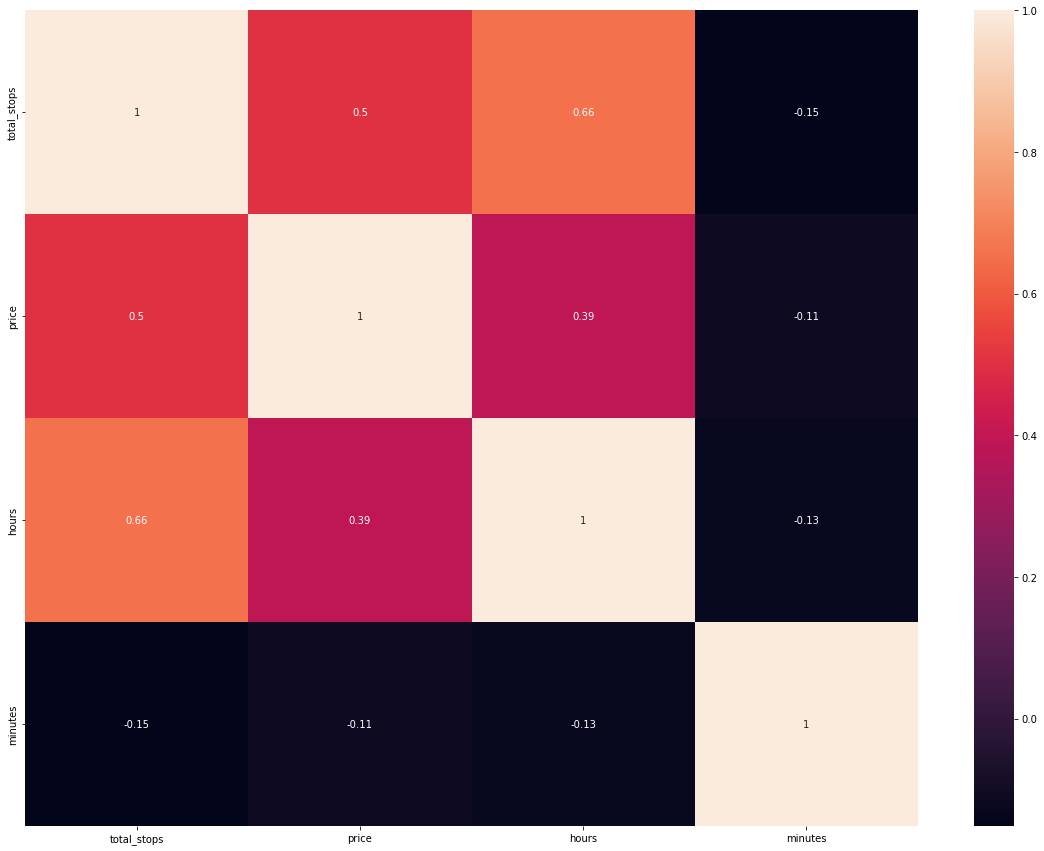

In [143]:
plt.figure(figsize=(20,15))
sns.heatmap(flight_reduc.corr(), annot=True)

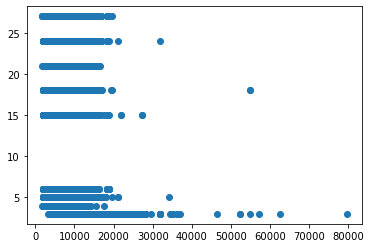

In [136]:
plt.scatter(flight_reduc['price'], flight_reduc['days'])
#plt.bar(flight_reduc['airline'], flight_reduc['days'])

In [27]:
sns.pairplot[flight_reduc]

TypeError: 'function' object is not subscriptable

Text(0.5, 1.0, 'destination VS Price')

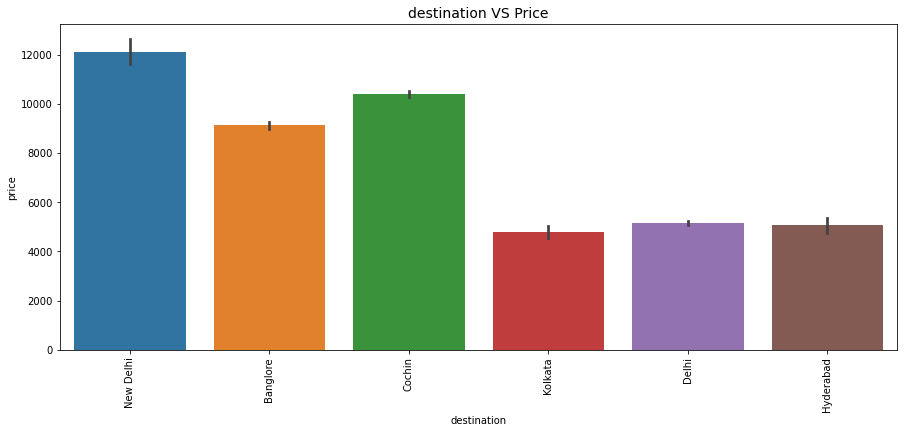

In [28]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=flight_reduc['destination'], y=flight_reduc['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('destination VS Price', fontsize=14)

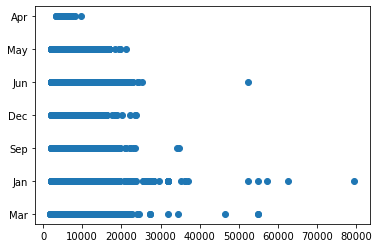

In [129]:
plt.scatter(flight_reduc['price'], flight_reduc['month'])

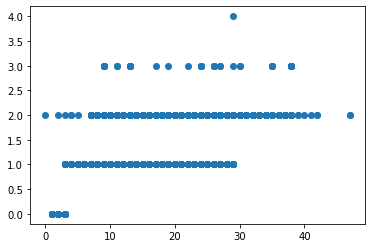

In [139]:
plt.scatter(flight_reduc['hours'], flight_reduc['total_stops'])

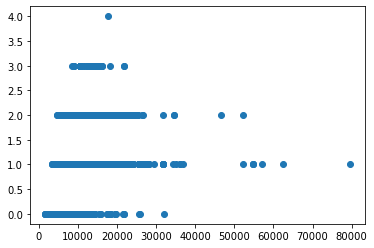

In [140]:
plt.scatter(flight_reduc['price'], flight_reduc['total_stops'])

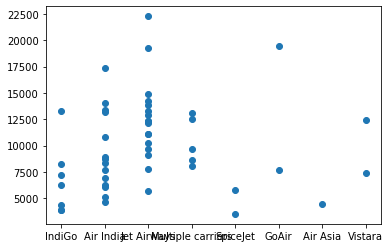

In [157]:
plt.scatter(flight_reduc['airline'][0:50], flight_reduc['price'][0:50])

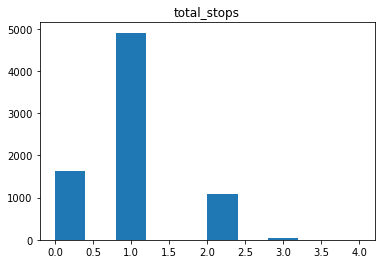

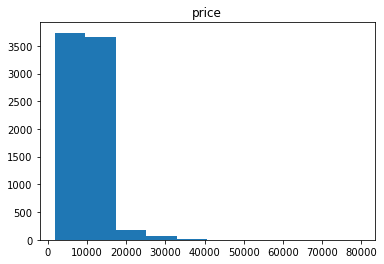

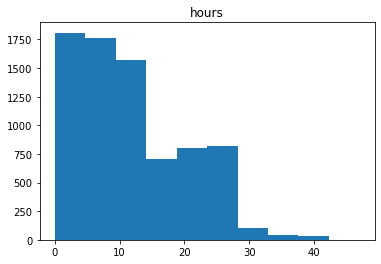

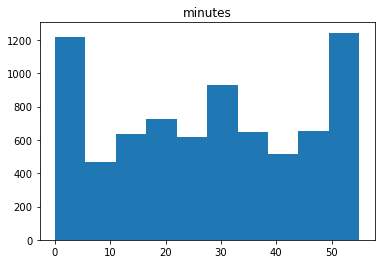

In [158]:
num_feature = flight_reduc.columns[flight_reduc.dtypes!='object']

def my_plot(feature):
    plt.hist(flight_reduc[feature])
    plt.title(feature)
    plt.show()
        
for i in num_feature:
    my_plot(i)

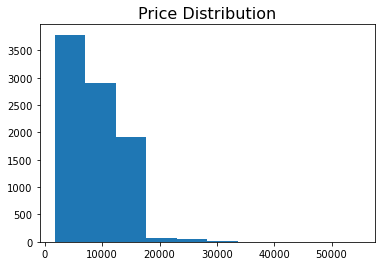

In [85]:
plt.hist(flight_reduc['price'])
plt.title('Price Distribution', size=16)
plt.show()

Text(0.5, 1.0, 'airline VS Price')

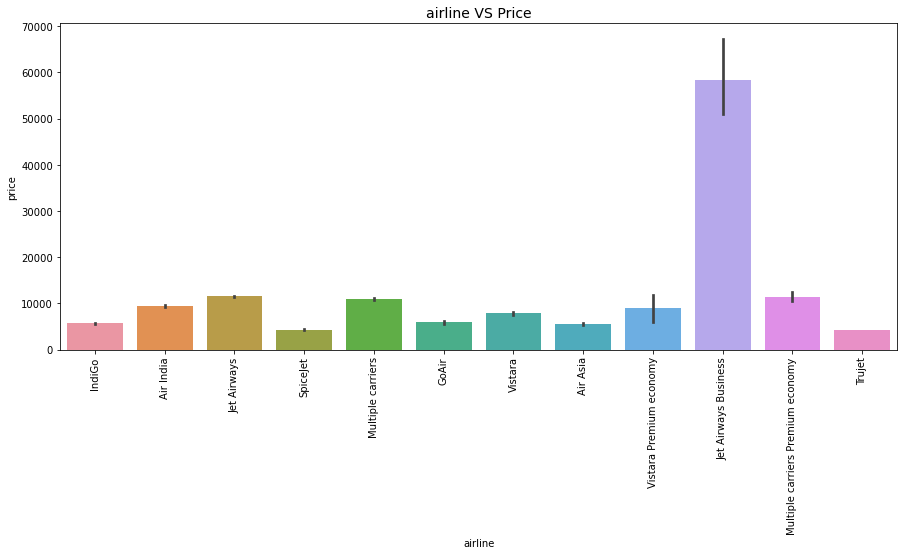

In [153]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=flight_reduc['airline'], y=flight_reduc['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('airline VS Price', fontsize=14)

Text(0.5, 1.0, 'airline VS Price')

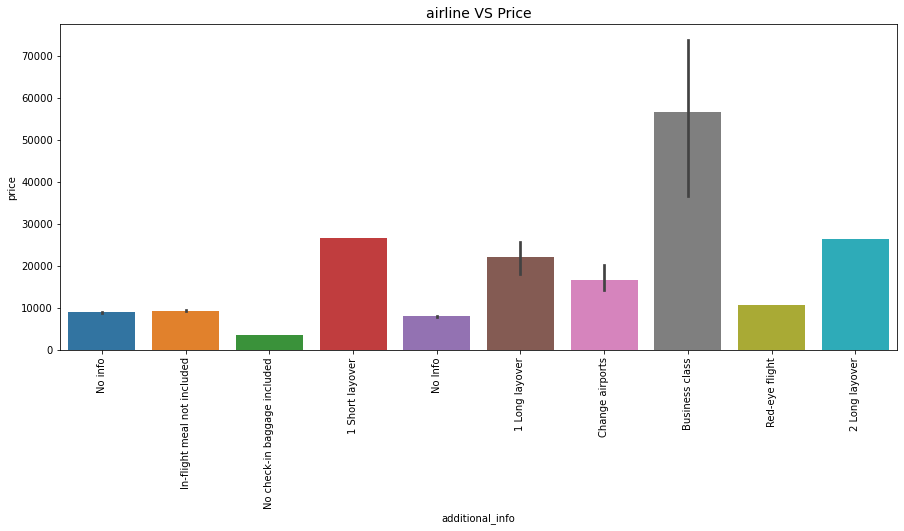

In [63]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=flight_reduc['additional_info'], y=flight_reduc['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('airline VS Price', fontsize=14)

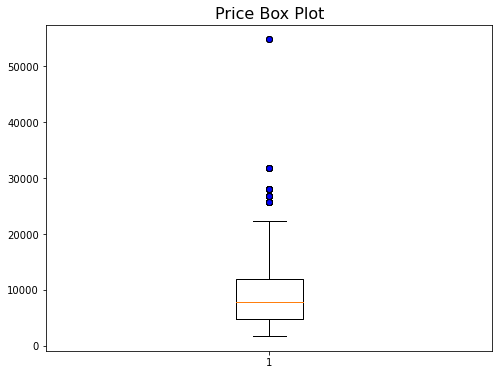

In [86]:
plt.figure(figsize=(8,6))
plt.boxplot(flight_reduc['price'], flierprops=dict(markerfacecolor='b', marker='o'), showfliers=True, vert=True)
plt.title('Price Box Plot', size=16)
plt.show()

# remove outliers

In [87]:
flight_reduc = flight_reduc[flight_reduc.price <= 50000]

In [88]:
flight_reduc.describe()

,total_stops,price,day,hours,minutes
count,8727.000000,8727.000000,8727.000000,8727.000000,8727.000000
mean,1.085711,8633.577976,12.785035,9.419044,28.235362
std,0.286828,4253.491511,8.680838,8.041282,16.783786
min,1.000000,1759.000000,3.000000,1.000000,0.000000
25%,1.000000,4878.000000,5.000000,2.000000,15.000000
50%,1.000000,7832.000000,6.000000,7.000000,30.000000
75%,1.000000,11982.000000,21.000000,14.000000,45.000000
max,3.000000,31825.000000,27.000000,42.000000,55.000000


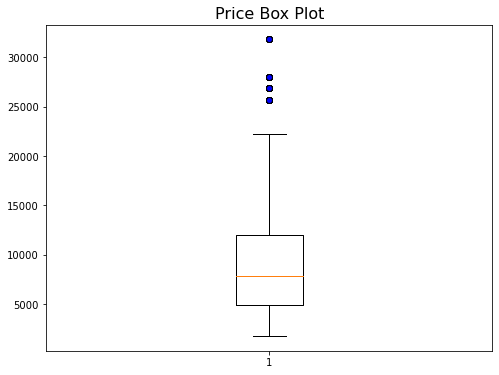

In [89]:
plt.figure(figsize=(8,6))
plt.boxplot(flight_reduc['price'], flierprops=dict(markerfacecolor='b', marker='o'), showfliers=True, vert=True)
plt.title('Price Box Plot', size=16)
plt.show()

In [126]:
flight_reduc = flight_reduc[flight_reduc.price <= 22000]

In [127]:
flight_reduc.describe()

,total_stops,price,day,hours,minutes
count,8665.000000,8665.000000,8665.000000,8665.000000,8665.000000
mean,1.086324,8506.651702,12.855049,9.390883,28.245817
std,0.287760,3987.977905,8.672147,8.047851,16.799516
min,1.000000,1759.000000,3.000000,1.000000,0.000000
25%,1.000000,4878.000000,5.000000,2.000000,15.000000
50%,1.000000,7757.000000,6.000000,7.000000,30.000000
75%,1.000000,11789.000000,21.000000,14.000000,45.000000
max,3.000000,21219.000000,27.000000,42.000000,55.000000


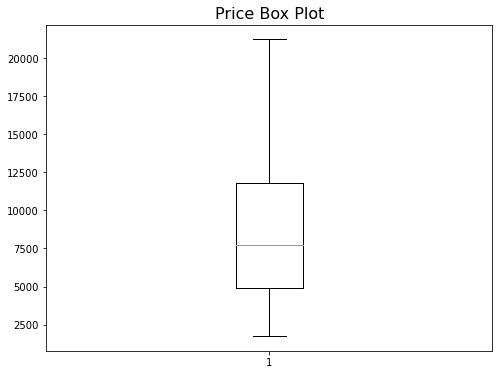

In [128]:
plt.figure(figsize=(8,6))
plt.boxplot(flight_reduc['price'], flierprops=dict(markerfacecolor='b', marker='o'), showfliers=True, vert=True)
plt.title('Price Box Plot', size=16)
plt.show()

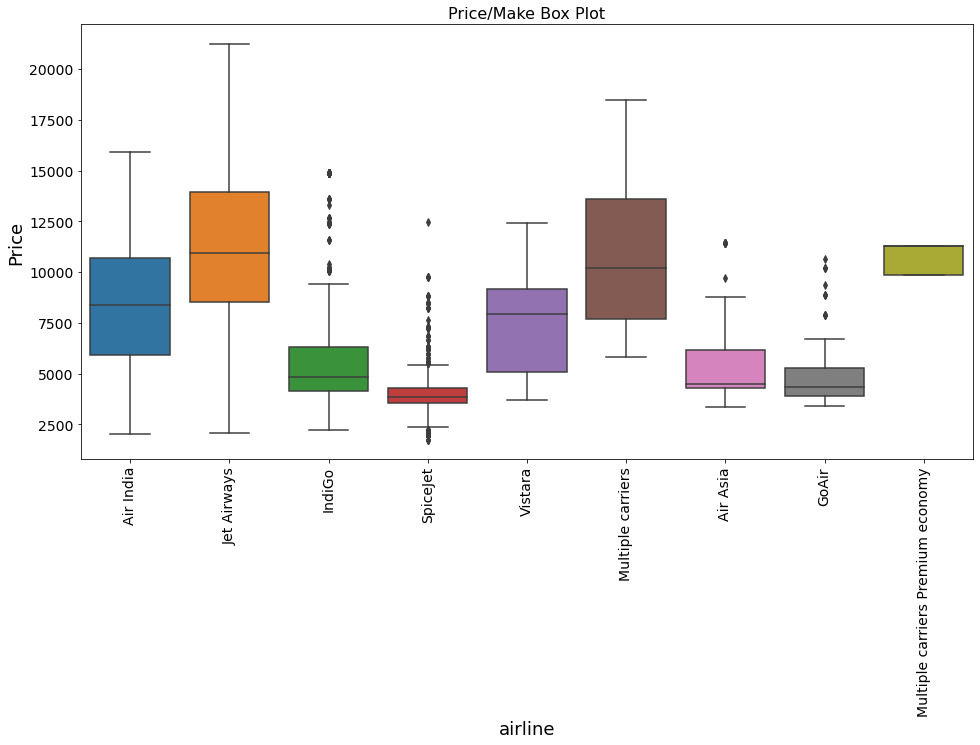

In [129]:
plt.figure(figsize=(16,8))
sns.boxplot(x=flight_reduc['airline'], y=flight_reduc['price'])
plt.title('Price/Make Box Plot', size=16)
plt.xlabel('airline', size=18)
plt.ylabel('Price', size=18)
plt.xticks(rotation='vertical', size=14)
plt.yticks(rotation='horizontal', size=14)
plt.show()

In [130]:
flight_objs = flight_reduc.select_dtypes(include=['object'])

In [131]:
flight_clear = pd.get_dummies(flight_objs, drop_first=True)

In [132]:
pd.get_dummies(flight_objs, drop_first=True).columns

Index(['airline_Air India', 'airline_GoAir', 'airline_IndiGo',
       'airline_Jet Airways', 'airline_Multiple carriers',
       'airline_Multiple carriers Premium economy', 'airline_SpiceJet',
       'airline_Vistara', 'source_Chennai', 'source_Delhi', 'source_Kolkata',
       'source_Mumbai', 'destination_Cochin', 'destination_Delhi',
       'destination_Hyderabad', 'destination_Kolkata', 'destination_New Delhi',
       'additional_info_In-flight meal not included',
       'additional_info_No check-in baggage included',
       'additional_info_No info', 'month_Dec', 'month_Jan', 'month_Jun',
       'month_Mar', 'month_May', 'month_Sep'],
      dtype='object')

In [133]:
flight_clear = pd.get_dummies(flight_reduc, drop_first=True)

In [134]:
flight_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8665 entries, 1 to 10682
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   total_stops                                   8665 non-null   float64
 1   price                                         8665 non-null   int64  
 2   day                                           8665 non-null   int64  
 3   hours                                         8665 non-null   float64
 4   minutes                                       8665 non-null   int64  
 5   airline_Air India                             8665 non-null   uint8  
 6   airline_GoAir                                 8665 non-null   uint8  
 7   airline_IndiGo                                8665 non-null   uint8  
 8   airline_Jet Airways                           8665 non-null   uint8  
 9   airline_Multiple carriers                     8665 non-null   

# splitting data and start model

In [135]:
x = flight_clear.drop('price', axis=1)
y = pd.DataFrame(flight_clear['price'])

In [136]:
x.head()

,total_stops,day,hours,minutes,airline_Air India,airline_GoAir,airline_IndiGo,airline_Jet Airways,airline_Multiple carriers,airline_Multiple carriers Premium economy,...,destination_New Delhi,additional_info_In-flight meal not included,additional_info_No check-in baggage included,additional_info_No info,month_Dec,month_Jan,month_Jun,month_Mar,month_May,month_Sep
1,2.0,5,7.0,25,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,2.0,6,19.0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1.0,5,5.0,25,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
5,1.0,24,2.0,25,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6,1.0,3,15.0,30,0,0,0,1,0,0,...,1,1,0,0,1,0,0,0,0,0


In [180]:
y.head()

,price
0,3897
1,7662
2,13882
4,13302
6,11087


In [137]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [138]:
x_train.shape

(7798, 30)

In [139]:
x_test.shape

(867, 30)

In [140]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

In [141]:
y_pred

array([[ 7727.55902935],
       [10677.75506064],
       [ 6205.43141251],
       [10684.55769656],
       [ 3939.51497401],
       [ 9703.00614418],
       [15161.85694568],
       [ 1637.58541901],
       [ 7203.57782477],
       [ 7601.53960383],
       [ 6948.46095926],
       [ 7453.28242768],
       [11549.8166179 ],
       [ 6366.64795441],
       [ 6151.51275055],
       [ 1873.23666104],
       [12343.90735873],
       [14290.583148  ],
       [13202.12033912],
       [ 3763.17458179],
       [ 4620.91660528],
       [10283.58364665],
       [ 5546.96704144],
       [13003.04397549],
       [ 6671.12154814],
       [10204.70487226],
       [ 5307.1316682 ],
       [ 6174.18269903],
       [ 6226.21715481],
       [ 9855.35332587],
       [11956.614653  ],
       [11956.78827367],
       [ 5387.75041284],
       [ 9251.2250983 ],
       [ 9545.61512307],
       [ 6136.29767367],
       [11340.94428607],
       [10595.41975722],
       [13109.04023333],
       [ 4613.14462247],


In [142]:
y_test

,price
1361,6386
3649,13039
3313,3210
1505,9646
1156,4591
...,...
3743,5201
10255,7229
6214,14571
4879,13587


In [144]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('MAE = ', mae.round(4))
print('RMSE = ', rmse.round(4))

MAE =  1512.9313
RMSE =  1954.66


with normalization

In [145]:
scaler_x = MinMaxScaler().fit(x_train)
scaler_y = MinMaxScaler().fit(y_train)

In [146]:
x_train_sc = scaler_x.transform(x_train)
x_test_sc = scaler_x.transform(x_test)
y_train_sc = scaler_y.transform(y_train)
y_test_sc = scaler_y.transform(y_test)

In [147]:
y_train.shape

(7798, 1)

In [148]:
lr_model_norm = LinearRegression()
lr_model_norm.fit(x_train_sc, y_train_sc)
y_pred_sc = lr_model_norm.predict(x_test_sc)

In [111]:
y_pred_sc

array([[ 2.05223083e-01],
       [ 7.36427307e-02],
       [ 1.43527985e-01],
       [ 6.00662231e-02],
       [ 3.74031067e-01],
       [ 2.63607025e-01],
       [ 2.68825531e-01],
       [ 3.87695312e-01],
       [ 4.72450256e-01],
       [ 7.36427307e-02],
       [ 2.66311646e-01],
       [ 1.52145386e-01],
       [ 2.55130768e-01],
       [ 6.64978027e-02],
       [-2.94303894e-02],
       [ 2.54592896e-01],
       [ 3.10531616e-01],
       [ 1.04194641e-01],
       [ 2.58010864e-01],
       [ 2.66223907e-01],
       [ 9.00268555e-02],
       [ 1.75140381e-01],
       [ 3.00533295e-01],
       [ 4.37526703e-01],
       [ 4.02366638e-01],
       [ 8.06236267e-02],
       [ 1.24069214e-01],
       [ 1.74324036e-01],
       [ 1.74365997e-01],
       [ 3.24943542e-01],
       [ 2.43953705e-01],
       [ 1.18957520e-01],
       [ 5.10215759e-02],
       [ 4.02145386e-01],
       [ 4.56878662e-01],
       [ 3.75862122e-01],
       [ 2.27611542e-01],
       [ 2.35324860e-01],
       [ 2.5

In [112]:
y_test_sc

array([[0.1441828 ],
       [0.13985898],
       [0.17451606],
       [0.06113218],
       [0.20810883],
       [0.28281115],
       [0.37048493],
       [0.43311382],
       [0.51559902],
       [0.12841748],
       [0.26288831],
       [0.07553383],
       [0.15908335],
       [0.04809419],
       [0.00685159],
       [0.35338921],
       [0.47725005],
       [0.12120003],
       [0.43906739],
       [0.28281115],
       [0.08860507],
       [0.11448147],
       [0.45370186],
       [0.56691944],
       [0.45882392],
       [0.07264019],
       [0.11318433],
       [0.34001863],
       [0.21845274],
       [0.19307523],
       [0.19028138],
       [0.12120003],
       [0.06984634],
       [0.43088539],
       [0.40105102],
       [0.40517528],
       [0.20514867],
       [0.12801836],
       [0.26288831],
       [0.12120003],
       [0.04460188],
       [0.16703253],
       [0.05933613],
       [0.13337325],
       [0.43088539],
       [0.28281115],
       [0.40517528],
       [0.033

In [149]:
mae = mean_absolute_error(y_test_sc, y_pred_sc)
rmse = np.sqrt(mean_squared_error(y_test_sc, y_pred_sc))

print('MAE = ', mae.round(4))
print('RMSE = ', rmse.round(4))

MAE =  0.0777
RMSE =  0.1004


Standrization

In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
scale= StandardScaler()

In [116]:
x_train_scaled = scale.fit_transform(x_train) 
y_train_scaled = scale.fit_transform(y_train) 
x_test_scaled = scale.fit_transform(x_test) 
y_test_scaled = scale.fit_transform(y_test) 

In [117]:
print(x_train_scaled)
print(y_train_scaled.shape)
print(x_test_scaled.shape)
print(y_test_scaled.shape)

[[-0.29843118  0.95239839  0.81045478 ... -0.47200963  1.96090727
  -0.38196885]
 [-0.29843118 -0.78053216  0.43833764 ... -0.47200963 -0.50996802
   2.61801451]
 [-0.29843118  1.2989845  -0.9260919  ... -0.47200963  1.96090727
  -0.38196885]
 ...
 [-0.29843118 -1.12711827 -0.18185761 ... -0.47200963 -0.50996802
  -0.38196885]
 [-0.29843118 -0.89606086 -0.55397475 ... -0.47200963 -0.50996802
  -0.38196885]
 [-0.29843118 -1.01158957  0.43833764 ... -0.47200963 -0.50996802
   2.61801451]]
(7854, 1)
(873, 30)
(873, 1)


In [118]:
lr_model_stan = LinearRegression()
lr_model_stan.fit(x_train_scaled, y_train_scaled)
y_pred_scaled = lr_model_stan.predict(x_test_scaled)

In [119]:
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))

print('MAE = ', mae.round(4))
print('RMSE = ', rmse.round(4))

MAE =  111578867255.8414
RMSE =  154697551181.4945
